In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.duplicated().sum()

3

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:

df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:

df.groupby("species").size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [9]:

le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:

df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

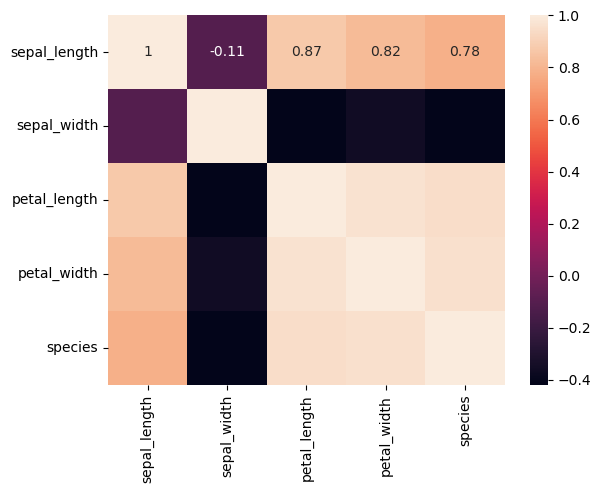

In [11]:
sns.heatmap(df.corr(), annot=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

<Figure size 640x480 with 0 Axes>

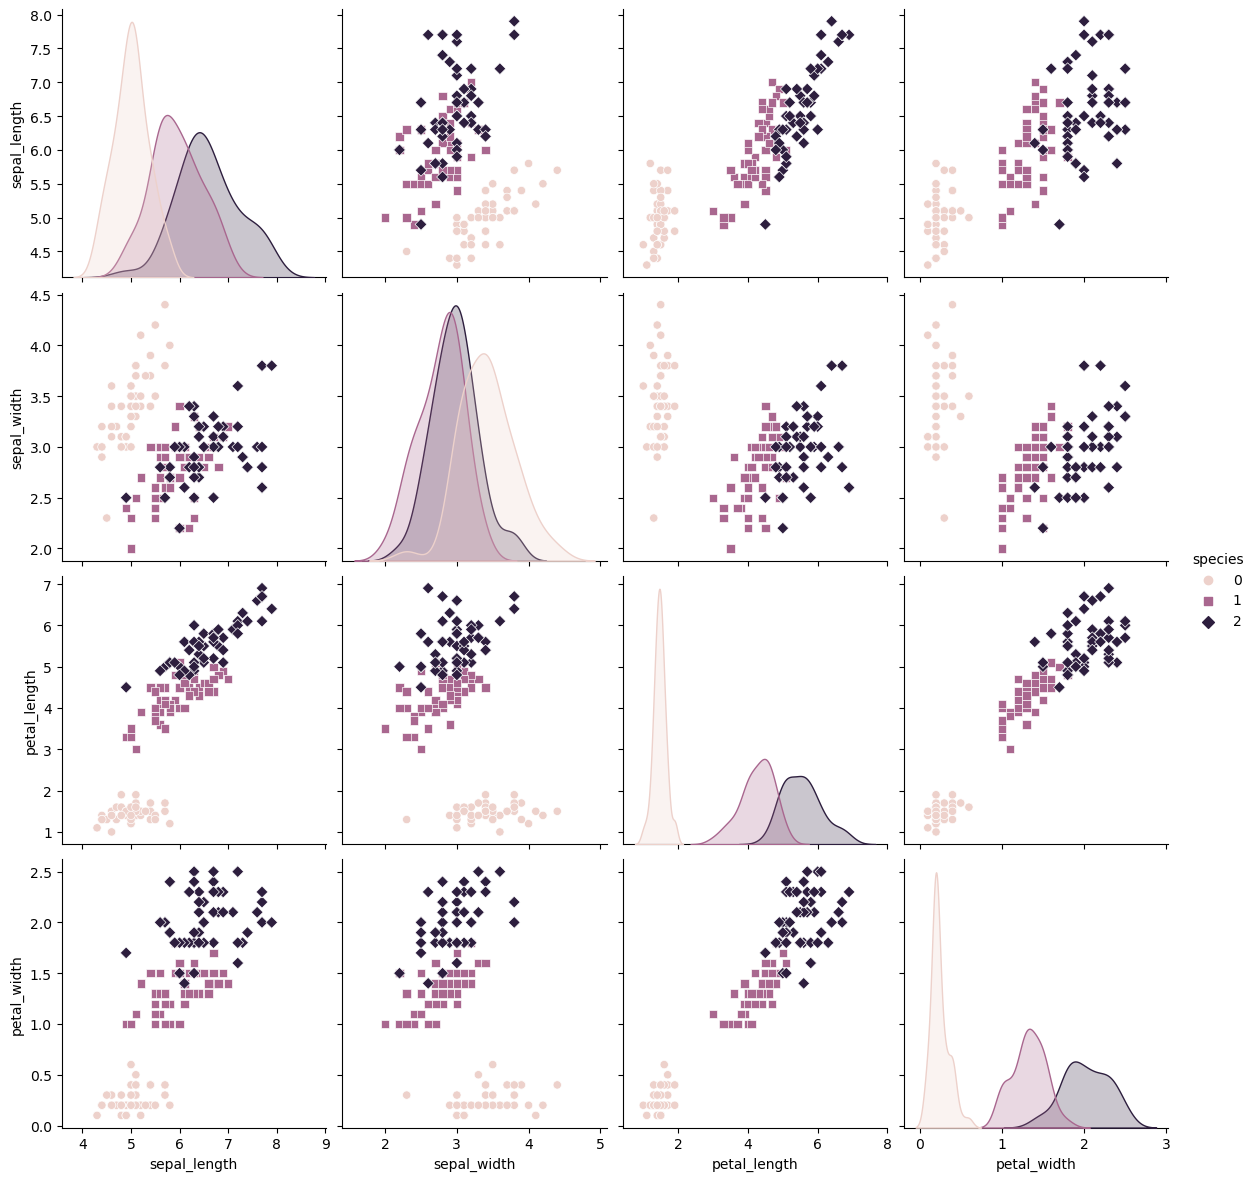

In [12]:
plt.figure()
sns.pairplot(df, hue = "species", height=3, markers=["o", "s", "D"])
plt.show()

In [13]:

y = df["species"]
x = df.drop("species", axis = 1)

In [14]:

x.shape

(150, 4)

In [15]:

y.shape

(150,)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 28)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def gen_metrics(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix :-\n',cm)
    print('\nClassification Report :-\n',classification_report(ytest,ypred))
    print('\nAccuracy Score : ',accuracy_score(ytest,ypred))

def train_test_score(m):
    print('\nTraining Score :', m.score(x_train,y_train))
    print('Testing Score/Accuracy Score :',m.score(x_test,y_test),'\n')

In [19]:

from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
m1.fit(x_train, y_train)
ypred_m1 = m1.predict(x_test)
df1 = pd.DataFrame({'y_test':y_test,'ypred_m1':ypred_m1})
df1.head()

,y_test,ypred_m1
24,0,0
134,2,1
81,1,1
14,0,0
114,2,2


In [20]:
gen_metrics(y_test,ypred_m1)
train_test_score(m1)

Confusion Matrix :-
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]

Classification Report :-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30


Accuracy Score :  0.9333333333333333

Training Score : 0.9666666666666667
Testing Score/Accuracy Score : 0.9333333333333333 



In [21]:

from sklearn.tree import DecisionTreeClassifier

m2 = DecisionTreeClassifier()
m2.fit(x_train,y_train)

ypred_m2 = m2.predict(x_test)
df2 = pd.DataFrame({'y_test':y_test,'ypred_m2':ypred_m2})
df2.head()

,y_test,ypred_m2
24,0,0
134,2,2
81,1,1
14,0,0
114,2,2


In [22]:
gen_metrics(y_test,ypred_m2)
train_test_score(m2)


Confusion Matrix :-
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]

Classification Report :-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Accuracy Score :  0.9666666666666667

Training Score : 1.0
Testing Score/Accuracy Score : 0.9666666666666667 



In [23]:

from sklearn.ensemble import RandomForestClassifier
m3=RandomForestClassifier()
m3.fit(x_train,y_train)
ypred_m3=m3.predict(x_test)
df1 = pd.DataFrame({'y_test':y_test,'ypred_m3':ypred_m3})
df1.head()

,y_test,ypred_m3
24,0,0
134,2,2
81,1,1
14,0,0
114,2,2


In [24]:

gen_metrics(y_test,ypred_m3)
train_test_score(m3)

Confusion Matrix :-
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]

Classification Report :-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Accuracy Score :  0.9666666666666667

Training Score : 1.0
Testing Score/Accuracy Score : 0.9666666666666667 



In [25]:
from sklearn.svm import SVC
m4 = SVC()
m4.fit(x_train, y_train)
ypred_m4 = m4.predict(x_test)
df1 = pd.DataFrame({'y_test':y_test,'ypred_m4':ypred_m4})
df1.head()

,y_test,ypred_m4
24,0,0
134,2,2
81,1,1
14,0,0
114,2,2


In [26]:
gen_metrics(y_test,ypred_m4)
train_test_score(m4)

Confusion Matrix :-
 [[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]

Classification Report :-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score :  1.0

Training Score : 0.9666666666666667
Testing Score/Accuracy Score : 1.0 



In [27]:

a = m1.score(x_test, y_test) * 100
b = m2.score(x_test, y_test) * 100
c = m3.score(x_test, y_test) * 100
d = m4.score(x_test, y_test) * 100

In [28]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest',
              'Support Vector Machines'],
    
    'Score': [a , b , c , d ]
    }) 


In [29]:
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Support Vector Machines,100.000000
1,Decision Tree,96.666667
2,Random Forest,96.666667
0,Logistic Regression,93.333333
